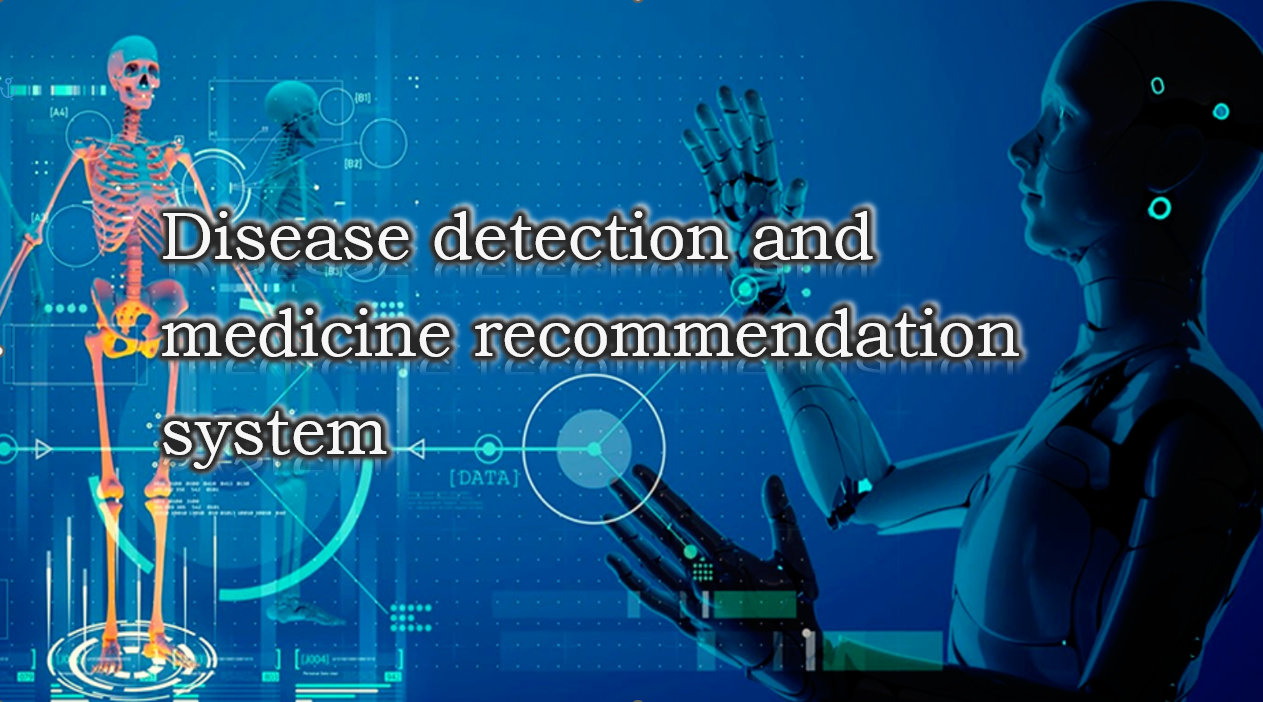

## Description 

<font size = "4" color = "magenta ">**Welcome to the Disease Detection and Medicine Recommendation System project! In this project, we aim to develop an intelligent system that detects diseases based on provided Symptoms of the patient  and recommends suitable medications. This project integrates advanced machine learning techniques to enhance healthcare by automating the diagnosis process and suggesting personalized medical solutions. Get ready to explore the world of data-driven healthcare solutions and a journey to create a system that contributes to better patient care**</font>

## load dataset & tools


In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('Dataset/Training.csv')

In [3]:
dataset.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
dataset.shape

(4920, 133)

<font size = "5" color = "yellow">**Here is a lot of columns of a symptoms and So each rows of the symptoms there is a right disease in columns and the last column, which we have to predict. That means, that this is multiclass classification**</font>

In [5]:
print("How many Types of diseases we have:-",len(dataset['prognosis'].unique()))
dataset['prognosis'].unique()

How many Types of diseases we have:- 41


array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

## Train test split.

In [6]:
from sklearn.model_selection import train_test_split

# Importing level incoder for converting the prognosis colomn to string into number
from sklearn.preprocessing import LabelEncoder

In [7]:
# Droping colomn from table making the input colomn
X = dataset.drop('prognosis', axis=1)  # input
Y = dataset['prognosis']   # output

In [8]:
X.head(2)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
pd.DataFrame(Y.head())

,prognosis
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection


<font size = "5" color = "blue">*We have to convert the diseases column into the number through the label encoder*</font>

In [10]:
le = LabelEncoder()
le.fit(Y)
y = le.transform(Y)

In [11]:
y

array([15, 15, 15, ..., 38, 35, 27])

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=20)

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3936, 132), (984, 132), (3936,), (984,))

## Training top models.

<font size = "5" color = "green">**So now we have to train the multiple models and We can select the particular model based on the result**</font>

In [14]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, accuracy_score

In [15]:
# Creating dictionary to store the modal for parellel training

models = {
    "SVC":SVC(kernel='linear'),
    "RandomForest":RandomForestClassifier(n_estimators=100,random_state=42),
    "GradientBoosting":GradientBoostingClassifier(n_estimators=100,random_state=42),
    "KNeighbor":KNeighborsClassifier(n_neighbors=5),
    "MultinomialNB":MultinomialNB()
}

for modal_name, model in models.items():
    
    # train model
    model.fit(X_train,y_train)

    # test model
    predications = model.predict(X_test)

    # calculate accuracy
    accuracy = accuracy_score(y_test,predications)

    # cslculate confussion matrix
    cm = confusion_matrix(y_test,predications)
    
    print(f"{modal_name} accuracy : {accuracy}")
    print(f"{modal_name} Confussion Matrix: {cm}")
    
    print(np.array2string(cm ,separator=", "))

SVC accuracy : 1.0
SVC Confussion Matrix: [[24  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 18 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 33  0]
 [ 0  0  0 ...  0  0 22]]
[[24,  0,  0, ...,  0,  0,  0],
 [ 0, 27,  0, ...,  0,  0,  0],
 [ 0,  0, 18, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 24,  0,  0],
 [ 0,  0,  0, ...,  0, 33,  0],
 [ 0,  0,  0, ...,  0,  0, 22]]
RandomForest accuracy : 1.0
RandomForest Confussion Matrix: [[24  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 18 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 33  0]
 [ 0  0  0 ...  0  0 22]]
[[24,  0,  0, ...,  0,  0,  0],
 [ 0, 27,  0, ...,  0,  0,  0],
 [ 0,  0, 18, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 24,  0,  0],
 [ 0,  0,  0, ...,  0, 33,  0],
 [ 0,  0,  0, ...,  0,  0, 22]]
GradientBoosting accuracy : 1.0
GradientBoosting Confussion Matrix: [[24  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 18 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0

## Single prediction 

In [16]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
ypred = svc.predict(X_test)
accuracy_score(ypred,y_test)

1.0

In [ ]:
# saving model
import pickle
pickle.dump(svc,open("svc.pkl",'wb'))

In [ ]:
# svc = pickle.load(open("model/svc.pkl",'rb'))

with open('svc.pkl', 'rb') as file:
    svc = pickle.load(file)

<font color = "green" size = "4">**Now we can do one prediction but The problem is the test data set is in 1D array and the training data set is in 2D array. So we have to convert our test data set to two dimensional array. And that's why we use reshape**</font>

In [ ]:
print("Predected Level: ",svc.predict(X_test.iloc[0].values.reshape(1, -1)))
print("Actual level: ", y_test[0])

In [ ]:
# ṭest 2
print("Predected Level: ",svc.predict(X_test.iloc[10].values.reshape(1, -1)))
print("Actual level: ", y_test[10])

<font color = "yellow" size = "4">**Now we have actually trained the model, and we can able to predict the result But we also want the actual label of the result because it just the encoded version of the result. We want the actual label that the user able to see. So we have to load the dataset**</font>

In [ ]:
precautions = pd.read_csv('Dataset/precautions_df.csv')
workout = pd.read_csv('Dataset/workout_df.csv')
description = pd.read_csv('Dataset/description.csv')
medications = pd.read_csv('Dataset/medications.csv')
diets = pd.read_csv('Dataset/diets.csv')

In [ ]:
sym_df.tail(4)

In [ ]:
precaution_df.head(4)

In [ ]:
# customised helper function for extract the data into the data set.

def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']
    return desc,pre,med,die,wrkout

<font color="orange" seze="4">**Because our data set is encoded so each diseases are symptoms have only the number the model doesn't know the actual name of the disease. So to display the actual name of the diseases we can create a dictionary of the actual number and the actual name of the diseases as corresponding**</font>

In [ ]:
symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

In [ ]:
# model predction function
# vif that convert actual values to string

def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
        
    # this line is giving the output as what disease we have
    return diseases_list[svc.predict([input_vector])[0]] # [0] is removing the bracket and returning the actual value

In [ ]:
# cleaning the user input

# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

In [ ]:
predicted_disease

In [ ]:
# final result printing
print("================================(predicated_disease)===================================")
print(predicted_disease)

print("=================================(Description)=========================================")
print(desc)

print("==================================(Precaution)==========================================")
i = 1
for p_i in pre[0]:
    print(i,": ",p_i)
    i += 1

print("===================================(Medications)========================================")
i = 1
for m_i in med:
    print(i,": ",m_i)
    i += 1

print("=====================================(Workout)=========================================")
i = 1
for w_i in wrkout:
    print(i,": ",w_i)
    i += 1

print("=======================================(Diets)=========================================")
i = 1
for d in die:
    print(i,": ",d)
    i += 1

In [ ]:
import sklearn
print(sklearn.__version__)

In [ ]:
print(np.__version__)
print(pd.__version__)